In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import warnings
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
import csv
from sklearn.metrics import accuracy_score
def get_algo_path():
    import os
    cwd = os.getcwd()
    s='\\'
    if '\\' not in cwd:
        s='/'
    cwd= cwd.split(s)[4:-1]
    cwd='/'.join(cwd)
    return cwd

def get_csv_path():
    import os
    cwd = os.getcwd()
    s="\\"
    if "\\" not in cwd:
        s='/'
    file= cwd.split(s)[:4]
    file.append('models_scores.csv')
    file= s.join(file)
    return file

def line_is_exist(file, row):
    logfile = open(file, 'r')
    loglist = logfile.readlines()
    logfile.close()
    for line in loglist:
        if ','.join(row) in line:
            return True
    return False

def write_new_score(file, line):
    if( not line_is_exist(file, line) ):
        with open(file, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(line)
    else:
        print('line exsist already')
    




In [2]:
data= pd.read_csv('../z_norm.csv')
### split data en X et Y

data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### ---SVM---

In [ ]:
params = {'C': [0.1, 1, 10, 100],  
          'gamma': [1, 0.1, 0.01, 0.001]}  
##accuracy
grid_search_acc= GridSearchCV(estimator=SVC(probability=True), param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

In [ ]:
## get avg precision & avg recall
report= classification_report(Y_test, y_predict, output_dict=True)
avg_list = report.pop("weighted avg")
avg_precision= round(avg_list['precision'], 3)
avg_recall= round(avg_list['recall'], 3)
accuraccy= round(accuracy_score(Y_test,y_predict), 3)
## csv row
csv_row = [get_algo_path(), 'SVM', str(grid_search_acc.best_params_), str(accuraccy), str(avg_precision), str(avg_recall)]
## write file
csv_file= get_csv_path()
write_new_score(csv_file, csv_row)


----------
best parameters:  {'gamma': 0.1, 'C': 100}
----------
[[11407  3952]
 [ 1147 14260]]
----------
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     15359
           1       0.78      0.93      0.85     15407

    accuracy                           0.83     30766
   macro avg       0.85      0.83      0.83     30766
weighted avg       0.85      0.83      0.83     30766

----------


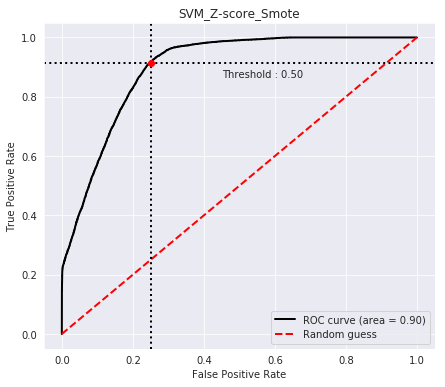

In [7]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

